<a href="https://colab.research.google.com/github/subhayuroy/Anomaly_Detection/blob/main/Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anomaly Detection

Anomaly detection can be treated as a statistical task as an outlier analysis. But if we develop a machine learning model, it can be automated and as usual, can save a lot of time.

*There are so many use cases of anomaly detection. Credit card fraud detection, detection of faulty machines, or hardware systems detection based on their anomalous features, disease detection based on medical records are some good examples. There are many more use cases.*

***And the use of anomaly detection will only grow.***

Importing the necessary packages

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('ex8data1.xlsx', sheet_name='X', header=None)

In [4]:
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


Let’s plot column 0 against column 1.

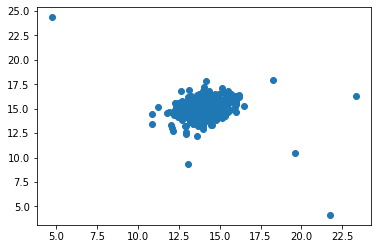

In [7]:
plt.figure()
plt.scatter(df[0], df[1])
plt.show()

In [8]:
m = len(df)

Calculate the mean for each feature. Here we have only two features: 0 and 1.

In [9]:
s = np.sum(df, axis=0)
mu = s/m
mu

0    14.112226
1    14.997711
dtype: float64

Let’s calculate the variance:

In [10]:
vr = np.sum((df - mu)**2, axis=0)
variance = vr/m
variance

0    1.832631
1    1.709745
dtype: float64

Now make it diagonal shaped.

In [11]:
var_dia = np.diag(variance)
var_dia

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

Calculate the probability:

In [12]:
k = len(mu)
X = df - mu
p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
p

0      6.470829e-02
1      5.030417e-02
2      7.245035e-02
3      5.031575e-02
4      6.368497e-02
           ...     
302    3.981340e-02
303    5.455673e-08
304    4.461721e-12
305    6.107184e-05
306    2.912867e-23
Length: 307, dtype: float64

The next step is to find out the threshold probability. If the probability is lower than the threshold probability, the example data is anomalous data. But we need to find out that threshold for our particular case.

For this step, we use cross-validation data and also the labels. In this dataset, we have the cross-validation data and also the labels in separate sheets.

In [13]:
cvx = pd.read_excel('ex8data1.xlsx', sheet_name='Xval', header=None)

In [14]:
cvx.head()

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


Here are the labels:

In [15]:
cvy = pd.read_excel('ex8data1.xlsx', sheet_name='y', header=None)
cvy.head()

,0
0,0
1,0
2,0
3,0
4,0


In [17]:
y = np.array(cvy)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Here, the value of ‘y’ 0 suggests that that’s a normal example and the y value of 1indicates that, it is an anomalous example.

In [18]:
p.describe()

count    3.070000e+02
mean     5.905331e-02
std      2.324461e-02
min      1.181209e-23
25%      4.361075e-02
50%      6.510144e-02
75%      7.849532e-02
max      8.986095e-02
dtype: float64

Define a function to calculate the true positives, false positives, and false negatives:

In [19]:
def tpfpfn(ep):
    tp, fp, fn = 0, 0, 0
    for i in range(len(y)):
        if p[i] <= ep and y[i][0] == 1:
            tp += 1
        elif p[i] <= ep and y[i][0] == 0:
            fp += 1
        elif p[i] > ep and y[i][0] == 1:
            fn += 1
    return tp, fp, fn

Make a list of the probabilities that are lower than or equal to the mean probability.

In [20]:
eps = [i for i in p if i <= p.mean()]

In [21]:
len(eps)

133

Define a function to calculate f1 score as per the formula we discussed before:

In [22]:
def f1(ep):
    tp, fp, fn = tpfpfn(ep)
    prec = tp/(tp + fp)
    rec = tp/(tp + fn)
    f1 = 2*prec*rec/(prec + rec)
    return f1

Now calculate the f1 score for all the epsilon or the range of probability values we selected before.

In [23]:
f = []
for i in eps:
    f.append(f1(i))

In [24]:
f

[0.14285714285714285,
 0.14035087719298248,
 0.1927710843373494,
 0.1568627450980392,
 0.208955223880597,
 0.41379310344827586,
 0.15517241379310345,
 0.28571428571428575,
 0.19444444444444445,
 0.5217391304347826,
 0.19718309859154928,
 0.19753086419753085,
 0.29268292682926833,
 0.14545454545454545,
 0.36363636363636365,
 0.16842105263157894,
 0.1935483870967742,
 0.1276595744680851,
 0.21818181818181817,
 0.2153846153846154,
 0.31578947368421056,
 0.17721518987341772,
 0.19672131147540986,
 0.20689655172413793,
 0.30000000000000004,
 0.5714285714285715,
 0.4444444444444444,
 0.16494845360824742,
 0.24,
 0.14414414414414414,
 0.14634146341463414,
 0.15841584158415842,
 0.19178082191780824,
 0.2,
 0.24489795918367346,
 0.1839080459770115,
 0.2121212121212121,
 0.140625,
 0.14285714285714288,
 0.14814814814814817,
 0.1475409836065574,
 0.2222222222222222,
 0.27272727272727276,
 0.5454545454545455,
 0.26086956521739135,
 0.3529411764705882,
 0.6,
 0.21052631578947367,
 0.186046511627906

This is part of the f score list. The length should be 133.

The f scores are usually ranged between 0 and 1 where 1 is the perfect f score. The higher the f1 score the better. So, we need to take the highest f score from the list of ‘f’ scores we just calculated.

**Now, use the ‘argmax’ function to determine the index of the maximum f score value.**

In [25]:
np.array(f).argmax()

131

And now use this index to get the threshold probability.

In [26]:
e = eps[131]
e

6.107184445968581e-05

###Find out the Anomalous Examples
We have the threshold probability. We can find out the labels of our training data from it.

If the probability value is lower than or equal to this threshold value, the data is anomalous and otherwise, normal. We will denote the normal and anomalous data as 0and 1 respectively,

In [27]:
label = []
for i in range(len(df)):
    if p[i] <= e:
        label.append(1)
    else:
        label.append(0)

In [28]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


This is part of the label list.

Adding this calculated labels in the training dataset above:

In [29]:
df['label'] = np.array(label)

In [30]:
df.head()

,0,1,label
0,13.046815,14.741152,0
1,13.408520,13.763270,0
2,14.195915,15.853181,0
3,14.914701,16.174260,0
4,13.576700,14.042849,0


In [33]:
import seaborn as sns